In [1]:
import sys
import numpy as np
import numpy.ma as ma
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
import cmocean
import glob

%matplotlib inline


/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/xarray/core/merge.py:16: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
config='EU36'
case='MPC001'
freq='1d'
year='2011'

datadir='/scratch/cnt0024/hmg2840/colombo/'+str(config)+'/'+str(config)+'-'+str(case)+'-S/'+str(freq)+'/'+str(year)+'/'
#!ls $datadir
gridfile='/scratch/cnt0024/hmg2840/colombo/EU36/EU36-I/coordinates_EU36.nc'
maskfile='/scratch/cnt0024/hmg2840/colombo/EU36/EU36-I/EU36.L75_mesh_mask.nc'

In [3]:
dsgrid=xr.open_dataset(gridfile)
dsmask=xr.open_dataset(maskfile)

In [4]:
def compute_EKE(u2,v2,u2mean,v2mean):
    ua=0.5*((-1*u2+u2mean)+(-1*u2.shift(x=1)+u2mean.shift(x=1)))
    va=0.5*((-1*v2+v2mean)+(-1*v2.shift(y=1)+v2mean.shift(y=1)))
    uat=ua.rename({'depthu':'deptht'})
    vat=va.rename({'depthv':'deptht'})
    eke=0.5*(uat+vat)
    return eke


In [5]:
dsU=xr.open_mfdataset('/scratch/cnt0024/hmg2840/colombo/EU36/EU36-MPC001-S/1d/2011/EU36-MPC001_y2011m01d??.1d_gridU.nc', chunks={'x':700,'y':1000,'time_counter':1,'depthu':1})
dsV=xr.open_mfdataset('/scratch/cnt0024/hmg2840/colombo/EU36/EU36-MPC001-S/1d/2011/EU36-MPC001_y2011m01d??.1d_gridV.nc', chunks={'x':700,'y':1000,'time_counter':1,'depthv':1})
u=dsU.vozocrtx
v=dsV.vomecrty
mask=dsmask.tmask[0]
u2=u*u
v2=v*v
u2mean=u2.mean(dim='time_counter')
v2mean=v2.mean(dim='time_counter')
eke=compute_EKE(u2,v2,u2mean,v2mean)

In [6]:
ds=xr.open_mfdataset('/scratch/cnt0024/hmg2840/albert7a/tests/EU36-MPC001_y2011m01d??.1d_EKE.nc')
eke_cdf=ds.voeke

In [7]:
eke

<xarray.DataArray (time_counter: 31, deptht: 75, y: 1718, x: 732)>
dask.array<shape=(31, 75, 1718, 732), dtype=float32, chunksize=(1, 1, 1000, 700)>
Coordinates:
  * deptht         (deptht) float32 0.50576 1.5558553 ... 5698.0605 5902.0576
    time_centered  (time_counter) datetime64[ns] dask.array<shape=(31,), chunksize=(1,)>
  * time_counter   (time_counter) datetime64[ns] 2011-01-01T12:00:00 ... 2011-01-31T12:00:00
Dimensions without coordinates: y, x

In [8]:
eke_cdf

<xarray.DataArray 'voeke' (time_counter: 31, deptht: 75, y: 1718, x: 732)>
dask.array<shape=(31, 75, 1718, 732), dtype=float32, chunksize=(1, 75, 1718, 732)>
Coordinates:
  * deptht        (deptht) float32 0.50576 1.5558553 ... 5698.0605 5902.0576
  * time_counter  (time_counter) datetime64[ns] 2011-01-01T12:00:00 ... 2011-01-31T12:00:00
Dimensions without coordinates: y, x
Attributes:
    units:             m2/s2
    valid_min:         0.0
    valid_max:         10000.0
    long_name:         Eddy_Kinetic_Energy
    short_name:        voeke
    iweight:           1
    online_operation:  N/A
    axis:              TZYX
    savelog10:         0.0

/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


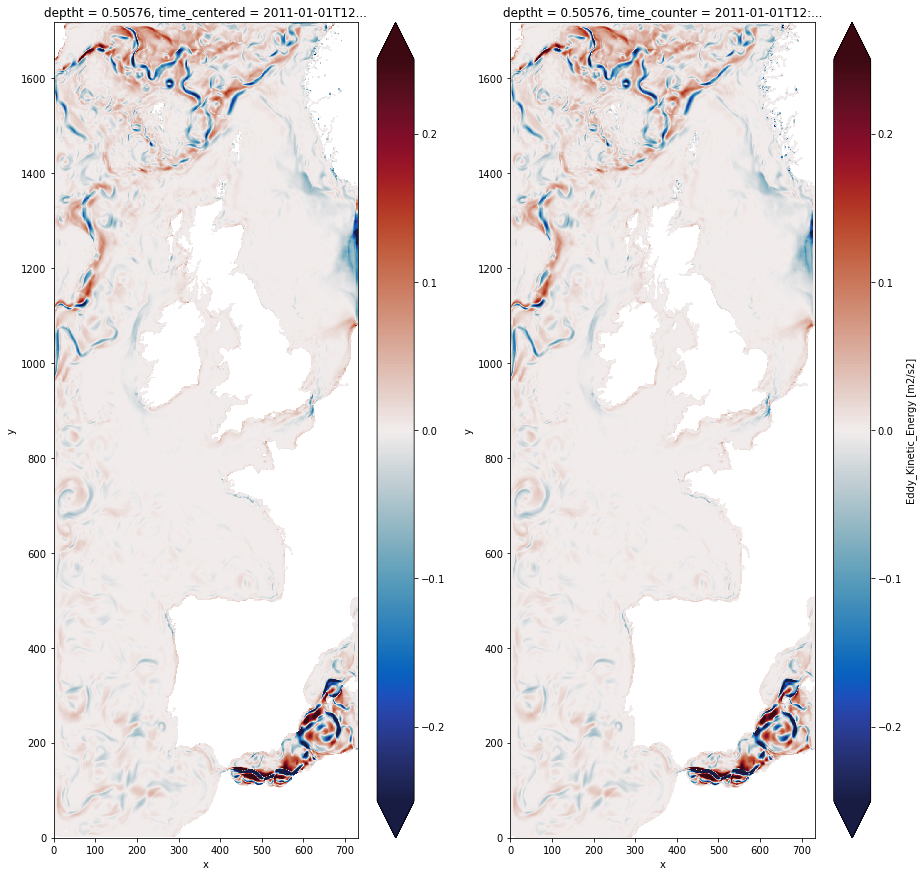

In [10]:
fig, axes = plt.subplots(1,2,figsize=(15,15))
axes = axes.ravel()

ax1=axes[0]
eke[0,0].plot(ax=ax1,vmin=-0.25,vmax=0.25,cmap='cmo.balance')

ax2=axes[1]
eke_cdf[0,0].plot(ax=ax2,vmin=-0.25,vmax=0.25,cmap='cmo.balance')



/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


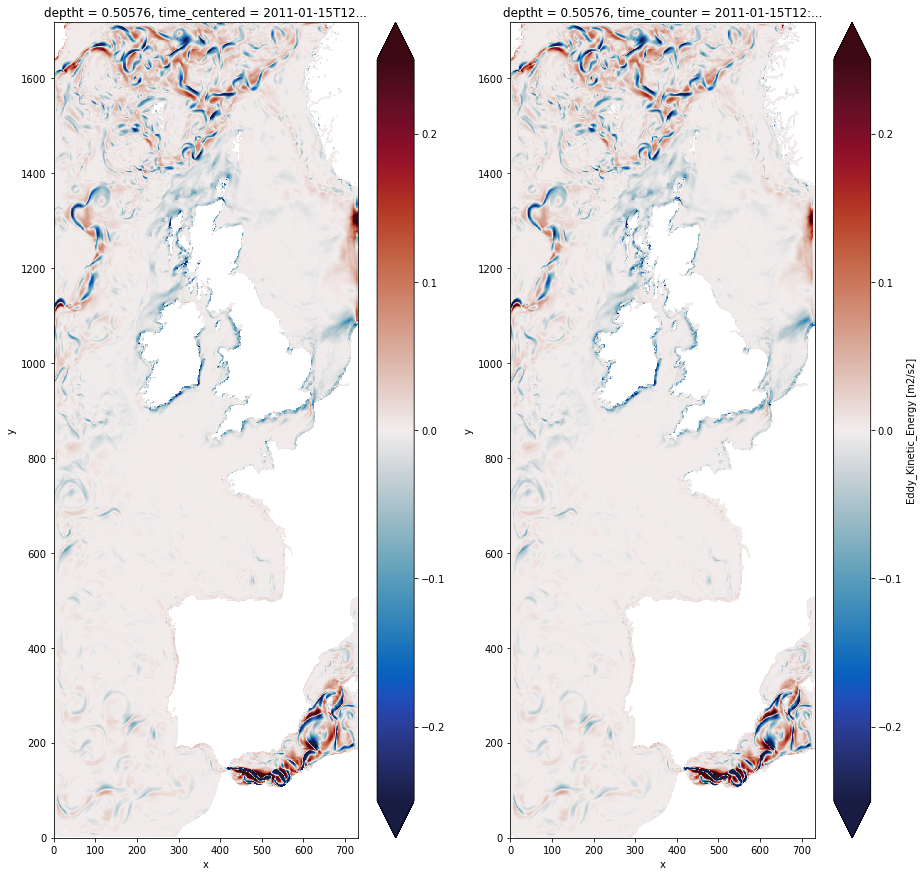

In [11]:
fig, axes = plt.subplots(1,2,figsize=(15,15))
axes = axes.ravel()

ax1=axes[0]
eke[14,0].plot(ax=ax1,vmin=-0.25,vmax=0.25,cmap='cmo.balance')

ax2=axes[1]
eke_cdf[14,0].plot(ax=ax2,vmin=-0.25,vmax=0.25,cmap='cmo.balance')



/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


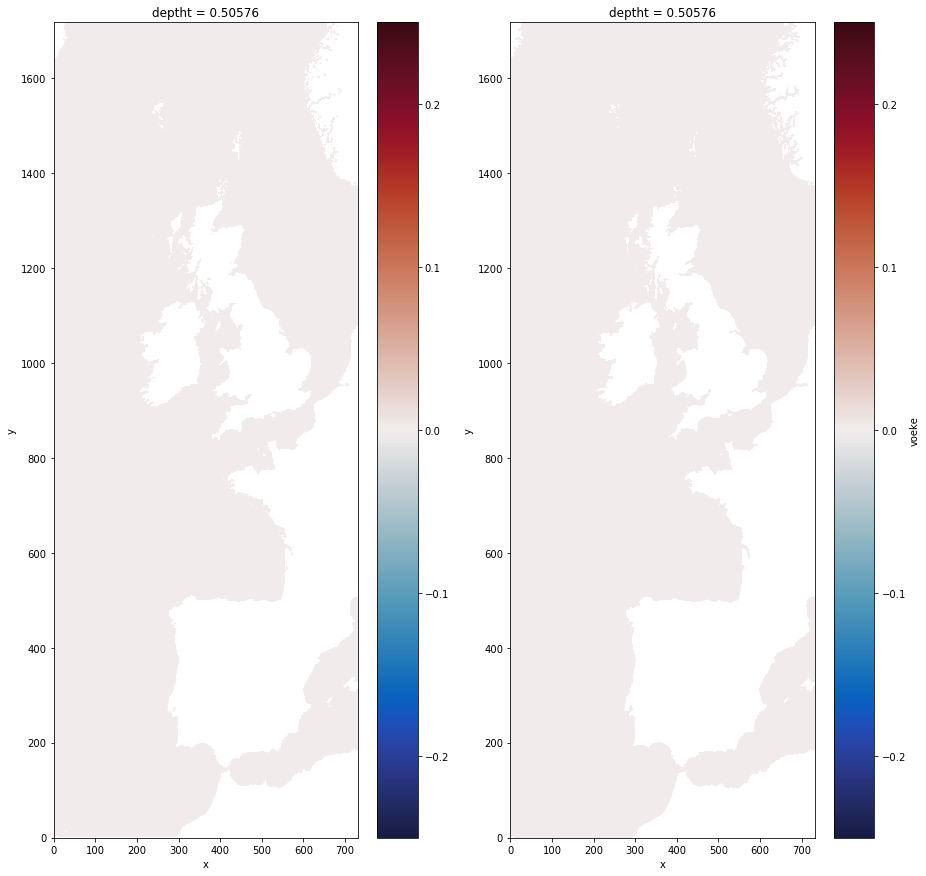

In [12]:
fig, axes = plt.subplots(1,2,figsize=(15,15))
axes = axes.ravel()

ax1=axes[0]
eke.mean(dim='time_counter')[0].plot(ax=ax1,vmin=-0.25,vmax=0.25,cmap='cmo.balance')

ax2=axes[1]
eke_cdf.mean(dim='time_counter')[0].plot(ax=ax2,vmin=-0.25,vmax=0.25,cmap='cmo.balance')

